In [67]:
import math
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd
from IPython import display
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score
import seaborn as sns

# **Data Generation**

In [68]:
data = []

for i in range(501):
  x1 = random.randint(0,100)
  x2 = random.randint(0,100)
  y = 0

  if 0<=x1<=100 and 0<=x2<=20:
    y = [1,0,0,0,0]
  elif 0<=x1<=100 and 20<x2<=40:
    y = [0,1,0,0,0]
  elif 0<=x1<=100 and 40<x2<=60:
    y = [0,0,1,0,0]
  elif 0<=x1<=100 and 60<x2<=80:
    y = [0,0,0,1,0]
  elif 0<=x1<=100 and 80<x2<=100:
    y = [0,0,0,0,1]

  data.append([[x1, x2], y])

In [69]:
data

[[[81, 16], [1, 0, 0, 0, 0]],
 [[81, 36], [0, 1, 0, 0, 0]],
 [[85, 54], [0, 0, 1, 0, 0]],
 [[19, 21], [0, 1, 0, 0, 0]],
 [[5, 75], [0, 0, 0, 1, 0]],
 [[93, 71], [0, 0, 0, 1, 0]],
 [[8, 44], [0, 0, 1, 0, 0]],
 [[32, 39], [0, 1, 0, 0, 0]],
 [[37, 91], [0, 0, 0, 0, 1]],
 [[81, 64], [0, 0, 0, 1, 0]],
 [[69, 70], [0, 0, 0, 1, 0]],
 [[46, 69], [0, 0, 0, 1, 0]],
 [[0, 90], [0, 0, 0, 0, 1]],
 [[93, 7], [1, 0, 0, 0, 0]],
 [[39, 33], [0, 1, 0, 0, 0]],
 [[92, 18], [1, 0, 0, 0, 0]],
 [[59, 5], [1, 0, 0, 0, 0]],
 [[39, 51], [0, 0, 1, 0, 0]],
 [[35, 13], [1, 0, 0, 0, 0]],
 [[87, 40], [0, 1, 0, 0, 0]],
 [[100, 49], [0, 0, 1, 0, 0]],
 [[68, 56], [0, 0, 1, 0, 0]],
 [[8, 32], [0, 1, 0, 0, 0]],
 [[39, 30], [0, 1, 0, 0, 0]],
 [[8, 49], [0, 0, 1, 0, 0]],
 [[88, 53], [0, 0, 1, 0, 0]],
 [[23, 68], [0, 0, 0, 1, 0]],
 [[14, 31], [0, 1, 0, 0, 0]],
 [[39, 95], [0, 0, 0, 0, 1]],
 [[5, 4], [1, 0, 0, 0, 0]],
 [[1, 5], [1, 0, 0, 0, 0]],
 [[86, 5], [1, 0, 0, 0, 0]],
 [[86, 64], [0, 0, 0, 1, 0]],
 [[87, 86], [0, 0, 0,

In [70]:
X = []
Y = []
for d in data:
  X.append(d[0])
  Y.append(d[1])

X = np.array(X)
Y = np.array(Y)

In [71]:
X_train = X[:400]
Y_train = Y[:400]
X_test = X[400:]
Y_test = Y[400:]

In [72]:
Y_train[0]

array([1, 0, 0, 0, 0])

In [73]:
X_train

array([[ 81,  16],
       [ 81,  36],
       [ 85,  54],
       [ 19,  21],
       [  5,  75],
       [ 93,  71],
       [  8,  44],
       [ 32,  39],
       [ 37,  91],
       [ 81,  64],
       [ 69,  70],
       [ 46,  69],
       [  0,  90],
       [ 93,   7],
       [ 39,  33],
       [ 92,  18],
       [ 59,   5],
       [ 39,  51],
       [ 35,  13],
       [ 87,  40],
       [100,  49],
       [ 68,  56],
       [  8,  32],
       [ 39,  30],
       [  8,  49],
       [ 88,  53],
       [ 23,  68],
       [ 14,  31],
       [ 39,  95],
       [  5,   4],
       [  1,   5],
       [ 86,   5],
       [ 86,  64],
       [ 87,  86],
       [ 62,   8],
       [ 88,  74],
       [ 38,  44],
       [ 11,  51],
       [ 83,  90],
       [ 52,  48],
       [  4,   0],
       [ 24,  12],
       [ 68,  94],
       [ 79,   5],
       [ 95,  97],
       [ 18,  34],
       [ 37,  98],
       [ 88,  31],
       [ 35,  95],
       [ 76,  65],
       [ 60,  51],
       [ 81,  60],
       [ 57,

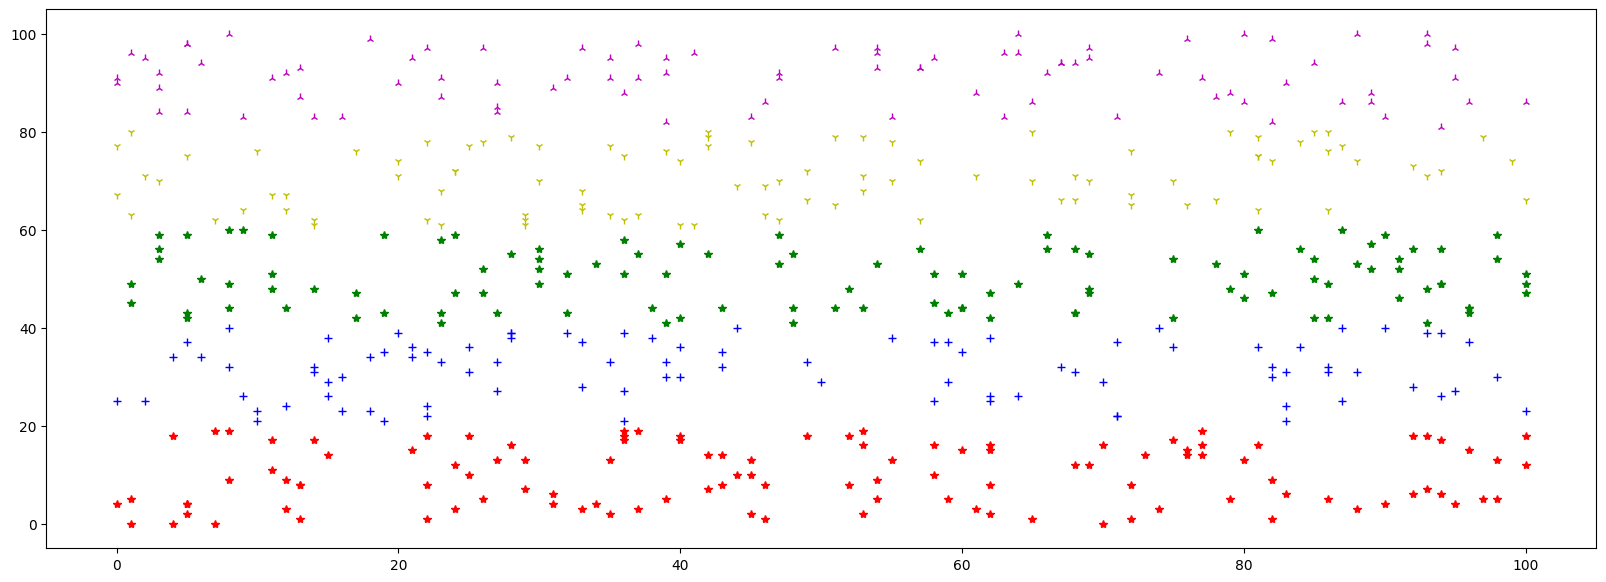

In [74]:
plt.figure(figsize=(20, 7))
for i in range(501):
  if Y[i][0] == 1:
    plt.plot(X[i][0], X[i][1], "r*")
  elif Y[i][1] == 1:
    plt.plot(X[i][0], X[i][1], "b+")
  elif Y[i][2] == 1:
    plt.plot(X[i][0], X[i][1], "g*")
  elif Y[i][3] == 1:
    plt.plot(X[i][0], X[i][1], "y1")
  elif Y[i][4] == 1:
    plt.plot(X[i][0], X[i][1], "m2")

plt.show()

# **Neural Network**

In [75]:
class NeuralNetwork(object):
    def __init__(self, hiddenLayer1Neurons = 10, hiddenLayer2Neurons = 10, hiddenLayer3Neurons = 10, learningRate = 0.1):
        inputLayerNeurons = 2
        outLayerNeurons = 5

        self.learning_rate = learningRate
        self.W_H1 = np.random.randn(inputLayerNeurons, hiddenLayer1Neurons)
        self.W_H2 = np.random.randn(hiddenLayer1Neurons, hiddenLayer2Neurons)
        self.W_H3 = np.random.randn(hiddenLayer2Neurons, hiddenLayer3Neurons)
        self.W_O = np.random.randn(hiddenLayer3Neurons, outLayerNeurons)

        self.B_H1 = np.random.randn(hiddenLayer1Neurons)
        self.B_H2 = np.random.randn(hiddenLayer2Neurons)
        self.B_H3 = np.random.randn(hiddenLayer3Neurons)
        self.B_O = np.random.randn(outLayerNeurons)

    def sigmoid(self, x, der=False):
        if der:
            return x * (1 - x)
        else:
            return 1 / (1 + np.exp(-x))

    def feedForward(self, X):
        # Calculate hidden layer 1 input and output
        hidden1_input = np.dot(X, self.W_H1) + self.B_H1
        self.hidden1_output = self.sigmoid(hidden1_input)

        # Calculate hidden layer 2 input and output
        hidden2_input = np.dot(self.hidden1_output, self.W_H2) + self.B_H2
        self.hidden2_output = self.sigmoid(hidden2_input)

        # Calculate hidden layer 3 input and output
        hidden3_input = np.dot(self.hidden2_output, self.W_H3) + self.B_H3
        self.hidden3_output = self.sigmoid(hidden3_input)

        # Calculate output layer input and output
        output_input = np.dot(self.hidden3_output, self.W_O) + self.B_O
        pred = self.sigmoid(output_input)
        return pred

    def backPropagation(self, X, Y, pred):
        # Calculate error at output
        output_error = Y - pred
        output_delta = self.learning_rate * output_error * self.sigmoid(pred, der=True)

        # Calculate error at hidden layer 3
        hidden3_error = output_delta.dot(self.W_O.T)
        hidden3_delta = self.learning_rate * hidden3_error * self.sigmoid(self.hidden3_output, der=True)

        # Calculate error at hidden layer 2
        hidden2_error = hidden3_delta.dot(self.W_H3.T)
        hidden2_delta = self.learning_rate * hidden2_error * self.sigmoid(self.hidden2_output, der=True)

        # Calculate error at hidden layer 1
        hidden1_error = hidden2_delta.dot(self.W_H2.T)
        hidden1_delta = self.learning_rate * hidden1_error * self.sigmoid(self.hidden1_output, der=True)

        # Update weights
        self.W_H1 += X.T.dot(hidden1_delta)
        self.W_H2 += self.hidden1_output.T.dot(hidden2_delta)
        self.W_H3 += self.hidden2_output.T.dot(hidden3_delta)
        self.W_O += self.hidden3_output.T.dot(output_delta)

        # Update Biases
        self.B_H1 += self.learning_rate * np.sum(hidden1_delta, axis=0)
        self.B_H2 += self.learning_rate * np.sum(hidden2_delta, axis=0)
        self.B_H3 += self.learning_rate * np.sum(hidden3_delta, axis=0)
        self.B_O += self.learning_rate * np.sum(output_delta, axis=0)

    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X, Y, output)

Epoch: 0, error: 0.17442416814403855
Epoch: 1000, error: 0.12201812302678804
Epoch: 2000, error: 0.11596345351479087
Epoch: 3000, error: 0.12220215864742213
Epoch: 4000, error: 0.12135195527378899
Epoch: 5000, error: 0.15702045593987876
Epoch: 6000, error: 0.12115468361061428
Epoch: 7000, error: 0.12227080327201001
Epoch: 8000, error: 0.11995541918003871
Epoch: 9000, error: 0.1139646005002478


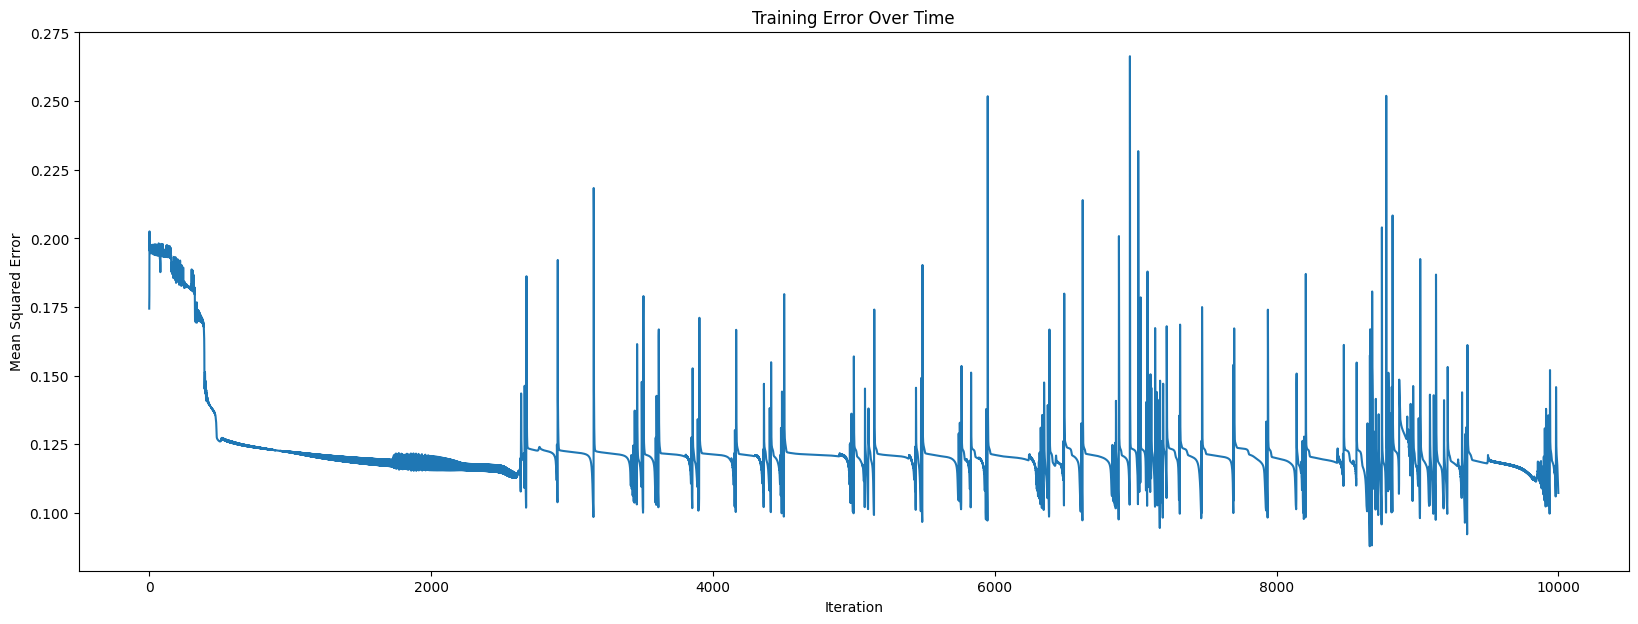

In [76]:
NN = NeuralNetwork()

err = []
for i in range(10000):
  NN.train(X_train, Y_train)
  err.append(np.mean(np.square(Y_train - NN.feedForward(X_train))))

  if i % 1000 == 0:
    print(f'Epoch: {i}, error: {err[i]}')

plt.figure(figsize=(20, 7))
plt.plot(err)
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.title('Training Error Over Time')
plt.show()

# **Evaluate Random Input**

In [77]:
# Returns probability of all classes
def getProb(pred):
    return {f'Class-{index}': p*100 for index, p in enumerate(pred)}

In [78]:
# returns the highest probablity
def getClass(dict):
  max_key = max(dict, key=dict.get)
  return (max_key)

In [88]:
pred = NN.feedForward([50, 30])
print(pred)
print(getProb(pred))
print(getClass(getProb(pred)))

[2.31033068e-03 4.07174048e-01 3.82375170e-01 3.06096319e-03
 1.75224405e-04]
{'Class-0': 0.2310330675684025, 'Class-1': 40.71740483889998, 'Class-2': 38.23751704334953, 'Class-3': 0.3060963186636497, 'Class-4': 0.01752244050883938}
Class-1


# **Evalution Matrics**

In [89]:
predictions = NN.feedForward(X_test)

Y_true = np.argmax(Y_test, axis=1)
Y_pred = np.argmax(predictions, axis=1)

accuracy = accuracy_score(Y_true, Y_pred)
precision = precision_score(Y_true, Y_pred, average = None)
recall = recall_score(Y_true, Y_pred, average = 'macro')
f1 = f1_score(Y_true, Y_pred, average = 'macro')

for i in range(5):
    print(f"Class {i}: Precision: {precision[i]}")

print(f"Overall accuracy: {accuracy}")
print(f"Overall Recall: {recall}")
print(f"Overall F1 Score: {f1}")
print(f"Overall Precision: {np.average(precision)}")


Class 0: Precision: 1.0
Class 1: Precision: 0.3
Class 2: Precision: 0.125
Class 3: Precision: 0.3333333333333333
Class 4: Precision: 0.8
Overall accuracy: 0.39603960396039606
Overall Recall: 0.39719140989729224
Overall F1 Score: 0.38448123315130983
Overall Precision: 0.5116666666666667


# **Documentation**

**Modifications Made:**

As previous Neural Network was for 2 distinct classes with 2 hidden layer, some modifications are made for the 3 hidden layer with 5 distinct classes. Such as -
1. 'outLayerNeurons' value was changed from 2 to 5
2. 'hiddenLayer3Neurons' variable was added to hold the newly added hidden layer.
3. 5 random Biases was added.
4. 2 Extra weights was added.
5. During forward propagation, input and output was calculated for 'hiddenLayer3Neurons'.
6. During back propagation, error and delca was calculated for hidden layer 3.

**Challenges:**

1. Generating a balanced dataset was the main challenge, as imbalanced dataset can lead to poor perfomance.
2. Difficulities were faced while visualizing the results.

# **Result and Analysis**

**Confusion Matrix**

In [81]:
# Confusion matrix
def conf_matrix(Y_true, Y_pred, c = 'magma'):
  conf_matrix = confusion_matrix(Y_true, Y_pred)
  print("Confusion Matrix:")
  print(conf_matrix)

  plt.figure(figsize=(10, 7))
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=c)
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title('Confusion Matrix')
  plt.show()

Confusion Matrix:
[[15  5  0  0  0]
 [ 2  1 10  4  0]
 [ 0  0  9  9  0]
 [ 0  0  5 16  0]
 [ 0  0  3 17  5]]


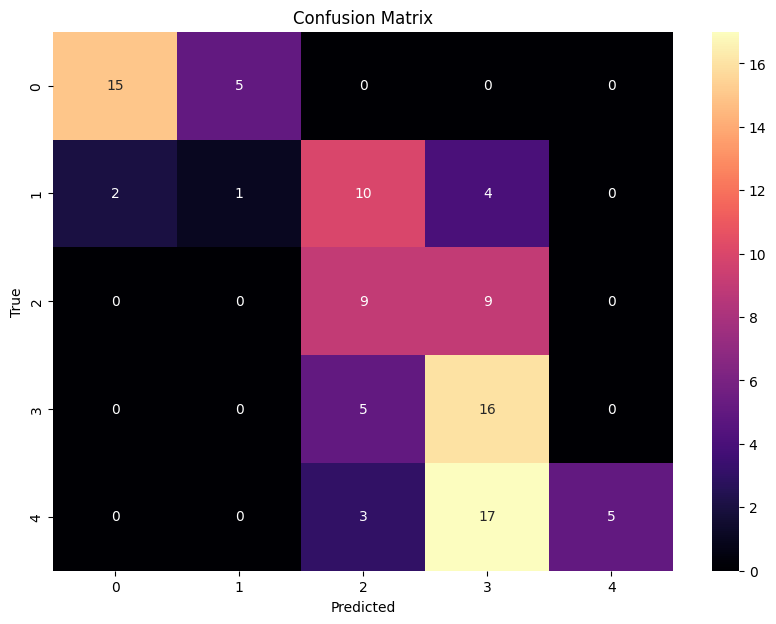

In [82]:
conf_matrix(Y_true, Y_pred)

**Insights:**

1. The neural network successfully learned to classify the synthetic dataset with five classes.
2. The sigmoid activation function and cross-entropy loss were effective in handling the multi-class classification problem.
3. The training loss decreased over epochs, indicating that the model was learning effectively.

**After Changing Parameters**

Epoch: 0, error: 0.10550485302597701
Epoch: 1000, error: 0.12012506781994076
Epoch: 2000, error: 0.12246118911180912
Epoch: 3000, error: 0.1122430611684928
Epoch: 4000, error: 0.12108762924903388
Epoch: 5000, error: 0.12002724186319451
Epoch: 6000, error: 0.11965461362416385
Epoch: 7000, error: 0.12214278637701767
Epoch: 8000, error: 0.11843836744420573
Epoch: 9000, error: 0.11413096348442076


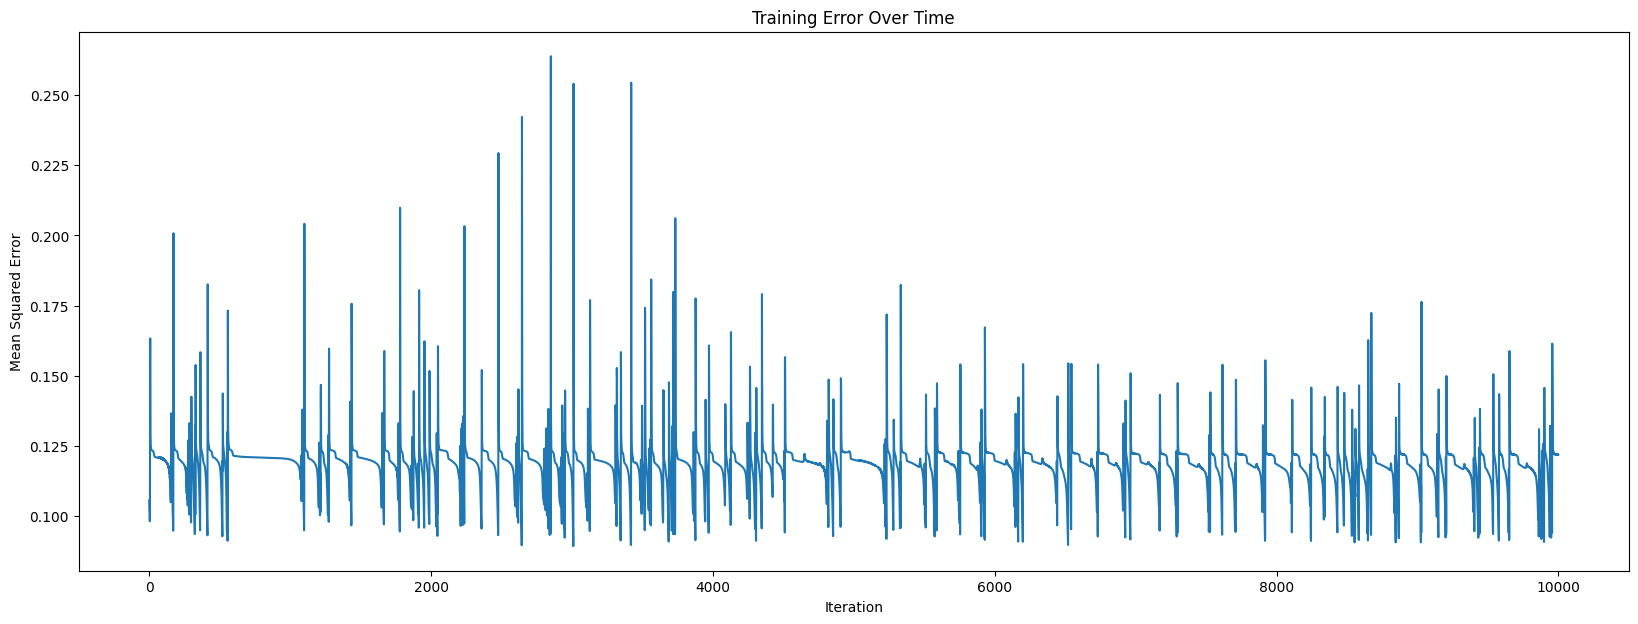

In [83]:
new_nn = NeuralNetwork(hiddenLayer1Neurons=20, hiddenLayer2Neurons=20, hiddenLayer3Neurons=20, learningRate=0.01)


err = []
for i in range(10000):
  NN.train(X_train, Y_train)
  err.append(np.mean(np.square(Y_train - NN.feedForward(X_train))))

  if i % 1000 == 0:
    # err_list.append(err)
    print(f'Epoch: {i}, error: {err[i]}')

plt.figure(figsize=(20, 7))
plt.plot(err)
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.title('Training Error Over Time')
plt.show()


In [84]:
predictions1 = new_nn.feedForward(X_test)

Y_true1 = np.argmax(Y_test, axis=1)
Y_pred1 = np.argmax(predictions1, axis=1)

**Confusion Matrix**

Confusion Matrix:
[[20  0  0  0  0]
 [12  0  5  0  0]
 [17  0  1  0  0]
 [16  0  5  0  0]
 [17  0  8  0  0]]


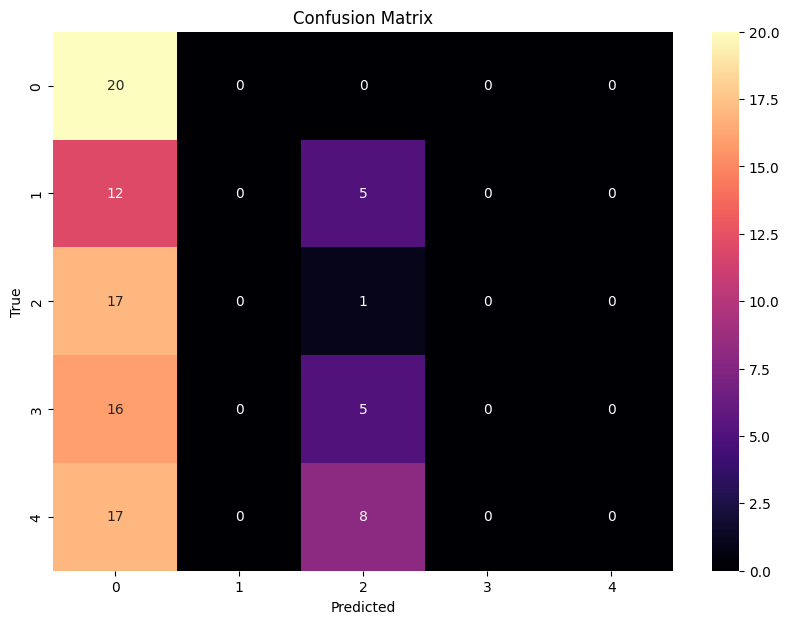

In [85]:
conf_matrix(Y_true1, Y_pred1)

In [90]:
accuracy = accuracy_score(Y_true1, Y_pred1)
precision = precision_score(Y_true1, Y_pred1, average = None)
recall = recall_score(Y_true1, Y_pred1, average = 'macro')
f1 = f1_score(Y_true1, Y_pred1, average = 'macro')

for i in range(5):
    print(f"Class {i}: Precision: {precision[i]}")

print(f"Overall accuracy: {accuracy}")
print(f"Overall Recall: {recall}")
print(f"Overall F1 Score: {f1}")
print(f"Overall Precision: {np.average(precision)}")

Class 0: Precision: 0.24390243902439024
Class 1: Precision: 0.0
Class 2: Precision: 0.05263157894736842
Class 3: Precision: 0.0
Class 4: Precision: 0.0
Overall accuracy: 0.2079207920792079
Overall Recall: 0.2111111111111111
Overall F1 Score: 0.08924218335983042
Overall Precision: 0.05930680359435173


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Comparizon**

When the 3 hidden layer has 10 neurons each and the learning rate was was 0.1,



*   Accuracy : 39%
*   Recall : 39%
*   F1 score : 38%
*   Precision : 51%



---


When the 3 hidden layer has 20 neurons each and the learning rate was was 0.01,
*   Accuracy : 20%
*   Recall : 21%
*   F1 score : 8%
*   Precision : 5%

# **Conclusion**

**Summary**

In this assignment, a 3 hidden layer neural network was implemented for multi-class classification. A synthetic dataset was generated with 5 different classes. The model was initially trained with 10 neurons for each hidden layer and the overall results are, accuracy = 39%, precision = 51%, recall = 39%, F1 score = 38%.

**Challenges and lessons**

The model struggled when the class name was numerical data, as it was creating unwanted pattern. The error was huge. This problem was solved using one-hot encoding.

**Further Improvements**

In this NN, sigmoid activation function was used. However, different activation function such as ReLU, Leaky ReLU, tanh can be used for better performance. Also changing learning rate and neurons of hidden layers can potentially improve performance.